Converged after 1226 iterations.


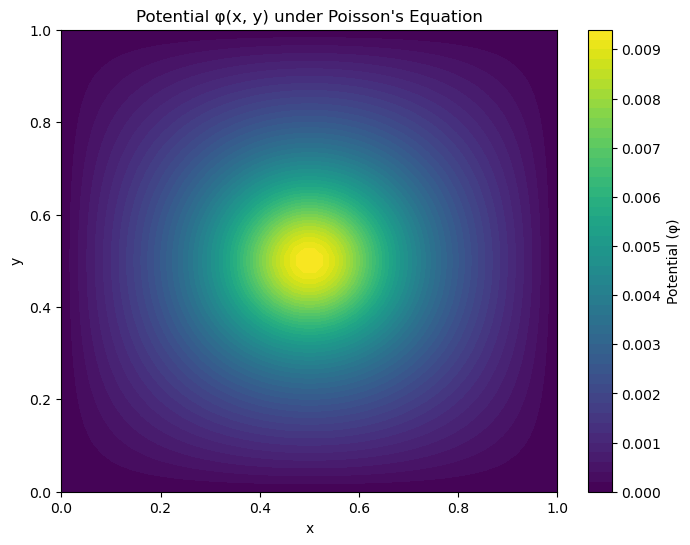

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Lx = 1.0  # Length of the domain in x-direction
Ly = 1.0  # Length of the domain in y-direction
Nx = 50   # Number of grid points in x-direction
Ny = 50   # Number of grid points in y-direction
dx = Lx / (Nx - 1)  # Grid spacing in x-direction
dy = Ly / (Ny - 1)  # Grid spacing in y-direction
epsilon_0 = 1.0     # Permittivity of free space

# Charge density function (example: point charge at the center)
def rho(x, y):
    return np.exp(-((x - 0.5)**2 / 0.01 + (y - 0.5)**2 / 0.01))

# Initialize potential array
phi = np.zeros((Nx, Ny))

# Boundary conditions (Dirichlet: phi = 0 at boundaries)
phi[:, 0] = 0  # y = 0
phi[:, -1] = 0  # y = Ly
phi[0, :] = 0  # x = 0
phi[-1, :] = 0  # x = Lx

# Finite difference iteration (Gauss-Seidel method)
max_iter = 10000
tolerance = 1e-6

for iteration in range(max_iter):
    phi_old = phi.copy()

    # Update potential using finite difference approximation
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            x = i * dx
            y = j * dy
            phi[i, j] = 0.25 * (
                phi_old[i + 1, j] + phi_old[i - 1, j] +
                phi_old[i, j + 1] + phi_old[i, j - 1] +
                dx**2 * rho(x, y) / epsilon_0
            )

    # Check for convergence
    if np.max(np.abs(phi - phi_old)) < tolerance:
        print(f"Converged after {iteration} iterations.")
        break

# Plot the potential
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi.T, levels=50, cmap='viridis')
plt.colorbar(label='Potential (φ)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potential φ(x, y) under Poisson\'s Equation')
plt.show()

In [ ]:
INDEX NUMBER - 3498322

In [ ]:
STUDENT REFERENCE NUMBER - 20939443